In [66]:
# Creating HTML file from URL
from bs4 import BeautifulSoup
import requests

def save_website_html(url, filename):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            html_content = response.text

            soup = BeautifulSoup(html_content, 'html.parser')
            frmt_html = soup.prettify()

            with open(filename, 'w', encoding='utf-8') as file:
                file.write(frmt_html)
        else:
            print(f"Failed to retrieve HTML content! Status Code: {response.status_code}")

    except requests.exceptions.RequestException as e:
        print(f"An error occurred while fetching the URL: {e}")

url = "https://www.daraz.com.np/smart-watches/"
filename="daraz_watches.html"
save_website_html(url, filename)

In [67]:
# Creating tree structure from html content
def element_to_tree(element):
    tree = {
        'tagName': element.name,
        'attributes': element.attrs,
        'content': element.text.strip(),
        'children': []
    }
    for child in element.children:
        if child.name:
            tree['children'].append(element_to_tree(child))

    return tree

def html_to_tree(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        html_content = file.read()

    soup = BeautifulSoup(html_content, 'html.parser')
    root_element = soup.body
    return element_to_tree(root_element)

tree = html_to_tree("daraz_watches.html")

In [ ]:
tree

In [69]:
tree.keys()

dict_keys(['tagName', 'attributes', 'content', 'children'])

In [70]:
f"tagName: {tree['tagName']}"

'tagName: body'

In [71]:
f"attributes: {tree['attributes']}"

"attributes: {'data-spm': 'searchlistcategory'}"

In [55]:
f"content: {tree['content']}"

'content: Become a Seller\n           \n\n\n\n            Payments & Recharge\n           \n\n\n\n            Help & Support\n           \n\n\n\n\n\n\n\n                Help Center\n               \n\n\n\n\n\n                Chat with Us\n               \n\n\n\n\n\n                Order\n               \n\n\n\n\n\n                Shipping & Delivery\n               \n\n\n\n\n\n                Payment\n               \n\n\n\n\n\n                Returns & Refunds\n               \n\n\n\n\n\n\n\n            Daraz Logistics Partner\n           \n\n\n\n\n            Save More on App\n           \n\n\n\n\n\n\n\n\n                Download the App\n               \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n                 Success! Please check your phone for the download link\n                \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n               Login\n              \n\n\n\n             |\n            \n\n\n              Sign Up\n             \n\n\n\n\n\

'children: [{\'tagName\': \'script\', \'attributes\': {}, \'content\': \'with(document)with(body)with(insertBefore(createElement("script"),firstChild))setAttribute("exparams","cfgver=1.0&aplus&asid=AQAAAABzLU9mGJp3KgAAAAAiemqLfwegUA==",id="beacon-aplus",src="//assets.alicdn.com/g/alilog??aplus_plugin_lazada/daraz_loader.js,mlog/aplus_int.js")\', \'children\': []}, {\'tagName\': \'script\', \'attributes\': {}, \'content\': \'window.LZD_RETCODE_SAMPLE=100;\\n        if("daraz" === \\\'daraz\\\') {\\n            window.LZD_RETCODE_PAGENAME = "daraz-search-desktop";\\n        } else {\\n            window.LZD_RETCODE_PAGENAME = "lzd-search-desktop";\\n        }\', \'children\': []}, {\'tagName\': \'script\', \'attributes\': {}, \'content\': \'window.__bl ={};\\n    window._blReport=function(e,t){window.__bl&&(__bl.api?__bl[e].apply(__bl,t):(__bl.pipe=__bl.pipe||[],__bl.pipe.push([e].concat(t))))},window.addEventListener("error",function(e){_blReport("error",[e.error,e])}),window.addEventLi
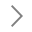

In [72]:
f"children: {tree['children']}"

In [73]:
len(tree["children"])

21

In [76]:
tree['children'][3]

{'tagName': 'script',
 'attributes': {},
 'content': "window.g_config = window.g_config || {};\n  window.g_config.regionID = 'NP';\n  window.g_config.language = 'en';",
 'children': []}

In [60]:
len(tree['children'][1])

4

In [ ]:
tree['children'][1]['children']

In [35]:
tagnames = []
attrs = []
cntnt = []
child = []

for i in tree['children']:
    if i['tagName']:
        tagnames.append(i['tagName'])

for i in tree['children']:
    if i['attributes']:
        attrs.append(i['attributes']) 

for i in tree['children']:
    if i['children']:
        child.append(i['children']) 

In [33]:
tagnames

['script', 'div', 'input', 'div', 'section', 'div', 'script', 'input']

In [34]:
attrs

[{'class': ['mui-zebra-module'],
  'data-module-id': '2553362700',
  'data-spm': '2553362700',
  'data-version': '5.4.86',
  'id': 'J_2553362700'},
 {'id': 'header-pc-config',
  'type': 'hidden',
  'value': '{"voyagerVersion":"2","voyagerEnv":"product","assetsRefactor":false,"regionID":"NP","language":"en","react":false,"needUmid":true,"channel":"default","version":{"nav":"5.4.12","search":"0.0.2","menu":"5.1.0","menuNav":"5.1.1","suffix":"-daraz"},"needRetCode":false,"retCodePageName":"","hideCategory":false,"needReact":false,"thymeleaf":false,"grayFilter":{"TH":false,"SG":false,"MY":false,"ID":false,"PH":false,"VN":false},"isHomePage":true,"isMiniHeader":false}'},
 {'class': ['hp-mod-card',
   'card-platform-campaign-banner',
   'J_CampaignBanner'],
  'data-module-id': 'campaignBanner',
  'style': 'background: '},
 {'class': ['J_BannerSlider'], 'data-mode-name': 'banner-slider'},
 {'class': ['page', 'regional_np'],
  'style': 'background-image:url(//icms-image.slatic.net/images/ims-w

In [43]:
cntnt

[]

In [44]:
child

[[{'tagName': 'script',
   'attributes': {'src': '//laz-g-cdn.alicdn.com/lzd/??polyfill/0.0.1/index.js,react/0.0.2/16.1.1/react.js,react/0.0.2/16.1.1/react-dom.js'},
   'content': '',
   'children': []},
  {'tagName': 'link',
   'attributes': {'href': '//laz-g-cdn.alicdn.com/lazada-search-fe/daraz-searchbox/0.1.0/index.css',
    'rel': ['stylesheet']},
   'content': '',
   'children': []},
  {'tagName': 'script',
   'attributes': {'src': '//laz-g-cdn.alicdn.com/lazada-search-fe/daraz-searchbox/0.1.0/index.js'},
   'content': '',
   'children': []},
  {'tagName': 'script',
   'attributes': {'exparams': 'cfgver=1.0&aplus',
    'frontplugins': 'aplus_plugin_lazada/1.0.43/daraz_index.js',
    'id': 'beacon-aplus',
    'src': '//assets.alicdn.com/g/alilog??aplus_plugin_lazada/daraz_loader.js,mlog/aplus_int.js'},
   'content': '',
   'children': []},
  {'tagName': 'script',
   'attributes': {},
   'content': "console.warn('aes disabled');",
   'children': []},
  {'tagName': 'script',
   'att

# Chunking HTML data

In [48]:
uq_tag_set = set()
uq_tag_ls = []
for i in tagnames:
    if i not in uq_tag_set:
        uq_tag_set.add(i)
        uq_tag_ls.append(i)

uq_tag_ls

['script', 'div', 'input', 'section']

In [49]:
from langchain_text_splitters import HTMLSectionSplitter

with open(file=filename, mode='r', encoding='utf-8') as file:
    html = file.read()

headers_to_split_on = uq_tag_ls
# print(headers_to_split_on)

html_splitter = HTMLSectionSplitter(headers_to_split_on=headers_to_split_on)
html_header_splits = html_splitter.split_text(html)
html_header_splits

ValueError: dictionary update sequence element #0 has length 6; 2 is required

In [37]:
from langchain_text_splitters import HTMLSectionSplitter

html = """
    <!DOCTYPE html>
    <html>
    <body>
        <div>
            <h1>Foo</h1>
            <p>Some intro text about Foo.</p>
            <div>
                <h2>Bar main section</h2>
                <p>Some intro text about Bar.</p>
                <h3>Bar subsection 1</h3>
                <p>Some text about the first subtopic of Bar.</p>
                <h3>Bar subsection 2</h3>
                <p>Some text about the second subtopic of Bar.</p>
            </div>
            <div>
                <h2>Baz</h2>
                <p>Some text about Baz</p>
            </div>
            <br>
            <p>Some concluding text about Foo</p>
        </div>
    </body>
    </html>
"""

headers_to_split_on = [("h1", "Header 1"), ("h2", "Header 2")]

html_splitter = HTMLSectionSplitter(headers_to_split_on=headers_to_split_on)
html_header_splits = html_splitter.split_text(html)
html_header_splits

[Document(page_content='Foo \n Some intro text about Foo.', metadata={'Header 1': 'Foo'}),
 Document(page_content='Bar main section \n Some intro text about Bar. \n Bar subsection 1 \n Some text about the first subtopic of Bar. \n Bar subsection 2 \n Some text about the second subtopic of Bar.', metadata={'Header 2': 'Bar main section'}),
 Document(page_content='Baz \n Some text about Baz \n \n \n Some concluding text about Foo', metadata={'Header 2': 'Baz'})]

# Testing LLM by directly sending HTML

In [2]:
import json 
import requests

filename = "daraz_watches.html"
with open(filename, 'r', encoding='utf-8') as file:
    html = file.read()

html

'<div class="lzd-site-menu-nav-menu">\n  <div class="mui-zebra-module" data-module-id="8018372580" data-spm="8018372580" data-version="5.1.21" id="J_8018372580">\n   <div class="lzd-site-nav-menu-dropdown" data-config="{}" data-mod-name="@ali/lzdmod-site-menu-pc-daraz/pc/index">\n    <ul class="lzd-site-menu-root" data-spm="cate">\n     <ul class="lzd-site-menu-sub Level_1_Category_No8" data-spm="cate_1">\n      <li class="lzd-site-menu-sub-item" data-cate="cate_1_1">\n       <a href="//www.daraz.com.np/womens-clothing/">\n        <span>\n         Clothing\n        </span>\n       </a>\n       <script class="J_data_0_0" type="text">\n        [{"childCategoryName":"Tops & T-shirts","childCategoryUrl":"//www.daraz.com.np/tops/","childCategoryImg":"//img.alicdn.com/tfs/TB1KcTbcOrpK1RjSZFhXXXSdXXa-240-240.jpg"},{"childCategoryName":"Hoodies & Sweatshirts","childCategoryUrl":"//www.daraz.com.np/womens-hoodies-sweatshirts/","childCategoryImg":"//img.alicdn.com/tfs/TB1PGy9cSzqK1RjSZPcXXbTepXa

## Using HuggingFace Model

In [6]:
from dotenv import load_dotenv, find_dotenv
import os

load_dotenv(find_dotenv())

key = os.environ['HF_KEY']

In [10]:
from langchain.schema import (HumanMessage, SystemMessage)
from langchain.llms import HuggingFaceEndpoint
from langchain_community.chat_models.huggingface import ChatHuggingFace

messages = [
    SystemMessage(
        content="""You are an expert in HTML parsing for E-commerce HTML blocks. Extract information about product, its prices and description from HTML in JSON Format along with the related CSS selector or XPaths.
                Remember to return response in JSON format as:
                product: Name of the product
                price: Price of the product
                desc: Information about the product
                img: Images associated with the product
                tag: CSS selectors or Xpaths"""
    ),
    HumanMessage(
        content="{html}"
    ),
]

llm = HuggingFaceEndpoint(
    repo_id = "mistralai/Mixtral-8x7B-Instruct-v0.1",
    huggingfacehub_api_token = key
)

chat_model = ChatHuggingFace(llm=llm)
chat_model._to_chat_prompt(messages)
res = chat_model.invoke(messages)
res

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to C:\Users\Acer\.cache\huggingface\token
Login successful


TemplateError: Only user and assistant roles are supported!

## Using Ollama Model

In [3]:
import json 
import requests

filename = "test.html"
with open(filename, 'r', encoding='utf-8') as file:
    html_ = file.read()

html_

'<div jscontroller="AtSb" class="w7Dbne CR1S4b" data-record-click-time="false" id="tsuid_48" jsdata="zt2wNd;_;A+m88g WDO8Ff;_;A+m88s" jsaction="rcuQ6b:npT2md;e3EWke:kN9HDb" data-hveid="CC4QAA">\n    <div jsname="jXK9ad" class="uMdZh tIxNaf rllt__borderless" jsaction="mouseover:UI3Kjd;mouseleave:Tx5Rb;focusin:UI3Kjd;focusout:Tx5Rb">\n      <div class="VkpGBb">\n        <div class="cXedhc">\n          <a class="vwVdIc wzN8Ac rllt__link a-no-hover-decoration" jsname="kj0dLd" data-cid="11265938073076301333" jsaction="click:h5M12e;" role="link" tabindex="0" data-ved="2ahUKEwjC7OW8romDAxXwFVkFHbmLAEoQ1YkKegQILhAB">\n            <div>\n              <div class="rllt__details">\n                <div class="dbg0pd" aria-level="3" role="heading"><span class="OSrXXb">Houndstooth Coffee</span></div>\n                <div><span><span class="Y0A0hc"><span class="yi40Hd YrbPuc" aria-hidden="true">4.6</span><span class="z3HNkc fUNJzc" aria-label="Rated 4.6 out of 5," role="img"><span style="width:12px

In [2]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.prompts import ChatPromptTemplate

messages = [
    SystemMessage(
        content="""You are an expert in HTML parsing for E-commerce HTML blocks. Extract information about product, its prices and description from HTML in JSON Format along with the related CSS selector or XPaths.
                Remember to return response in JSON format as:
                product: Name of the product
                price: Price of the product
                desc: Information about the product
                img: Images associated with the product
                tag: CSS selectors or Xpaths"""
    ),
    HumanMessage(
        content="{html_}"
    )
]
prompt = ChatPromptTemplate.from_messages(messages)
html = json.dumps(html_, indent=2)

In [3]:
html

'"<div jscontroller=\\"AtSb\\" class=\\"w7Dbne CR1S4b\\" data-record-click-time=\\"false\\" id=\\"tsuid_48\\" jsdata=\\"zt2wNd;_;A+m88g WDO8Ff;_;A+m88s\\" jsaction=\\"rcuQ6b:npT2md;e3EWke:kN9HDb\\" data-hveid=\\"CC4QAA\\">\\n    <div jsname=\\"jXK9ad\\" class=\\"uMdZh tIxNaf rllt__borderless\\" jsaction=\\"mouseover:UI3Kjd;mouseleave:Tx5Rb;focusin:UI3Kjd;focusout:Tx5Rb\\">\\n      <div class=\\"VkpGBb\\">\\n        <div class=\\"cXedhc\\">\\n          <a class=\\"vwVdIc wzN8Ac rllt__link a-no-hover-decoration\\" jsname=\\"kj0dLd\\" data-cid=\\"11265938073076301333\\" jsaction=\\"click:h5M12e;\\" role=\\"link\\" tabindex=\\"0\\" data-ved=\\"2ahUKEwjC7OW8romDAxXwFVkFHbmLAEoQ1YkKegQILhAB\\">\\n            <div>\\n              <div class=\\"rllt__details\\">\\n                <div class=\\"dbg0pd\\" aria-level=\\"3\\" role=\\"heading\\"><span class=\\"OSrXXb\\">Houndstooth Coffee</span></div>\\n                <div><span><span class=\\"Y0A0hc\\"><span class=\\"yi40Hd YrbPuc\\" aria-hidden

In [4]:
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import StrOutputParser

llm = ChatOllama(model="llama2", format="json", temperature=0)
chain = prompt | llm | StrOutputParser()

chain.invoke({"html": html})

'{\n"product": "Smartwatch",\n"price": "$199.99",\n"desc": "<p>Stay connected and on top of your game with this sleek smartwatch. Track your fitness goals, receive notifications, and control your music all from one convenient device.</p>",\n"img": ["https://example.com/smartwatch1.jpg", "https://example.com/smartwatch2.jpg"],\n"tag": ["div.product-info", "span.price", "p.description"]\n}\n\n\n'

## Using Ollama Functions

In [11]:
from langchain_experimental.llms.ollama_functions import OllamaFunctions

model = OllamaFunctions(model="llama2",
                        format="json")
model = model.bind_tools(
    tools=[{
        "name": "get_parsed_html_in_json",
        "description": "Get the parsed HTML in JSON format",
        "parameters":[{
            "product": "Name of the product",
            "price": "Price of the product",
            "desc": "Information about the product",
            "img": "Images associated with the product",
            "tag": "CSS selectors or Xpaths"}]
    }],
    function_call={"name": "get_parsed_html_in_json"},
)
model

RunnableBinding(bound=OllamaFunctions(format='json'), kwargs={'functions': [{'name': 'get_parsed_html_in_json', 'description': 'Get the parsed HTML in JSON format', 'parameters': [{'product': 'Name of the product', 'price': 'Price of the product', 'desc': 'Information about the product', 'img': 'Images associated with the product', 'tag': 'CSS selectors or Xpaths'}]}], 'function_call': {'name': 'get_parsed_html_in_json'}})

In [ ]:
model.invoke(html)

In [4]:
from langchain_experimental.llms.ollama_functions import OllamaFunctions
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field

class Output(BaseModel):
    product: str = Field(description="Name of the product", required=True)
    price: str = Field(description="Price of the product",)
    desc: str = Field(description="Information about the product")
    img: str = Field(description="Images associated with the product")
    tag: str = Field("CSS selectors of Xpaths", required=True)

prompt = PromptTemplate.from_template(
    """You are an expert in HTML parsing for E-commerce HTML blocks. Extract information about product, its prices and description from HTML in JSON Format along with the related CSS selector or XPaths.
Remember to return response in JSON format

Human: {html}
AI: """
)

llm = OllamaFunctions(
    model="llama3",
    format="json",
    temperature=0
)

struct_llm = llm.with_structured_output(Output)
chain = prompt | struct_llm
html = json.dumps(html_, indent=2)
chain.invoke(html)

OllamaEndpointNotFoundError: Ollama call failed with status code 404. Maybe your model is not found and you should pull the model with `ollama pull llama3`.